# 1. Import Library

In [41]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 数据预处理

In [42]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [43]:
"""
训练样本、标签 type: numpy  
keras 的sequential模型要在Numpy矩阵上进行训练。
第一层的卷积核需要知道图像的深度（几个颜色通道）所以这里增加一个表示颜色的维度，于是样本的维度：样本数量 * image的宽 * image的高 * image的深
"""
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')   

In [44]:
x_Train4D_normalize = x_Train4D / 255 #标准化：提高模型预测的准确度，更快收敛（验证否？）
x_Test4D_normalize = x_Test4D / 255

In [45]:
y_TrainOneHot = np_utils.to_categorical(y_Train) # 对标签进行编码
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [230]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [231]:
model = Sequential() # keras中的线型堆叠模型

In [232]:
model.add(Conv2D(filters=6,
                 kernel_size=(5,5),
                 padding='valid',         # 卷积时不进行填充
                 input_shape=(28,28,1),   # image height * image width * 颜色通道（单色灰度图像）
                 activation='relu'))      # 激活函数

In [233]:
"""
缩减采样
减少需要处理的数据点。
减小图像的尺寸，数字的位置差异就会变小，因为数字的不同的位置可能影响识别。
参数量下降意味着计算量下降和一定程度上的控制了过拟合。

"""
model.add(MaxPooling2D(pool_size=(2, 2))) 

In [234]:
model.add(Conv2D(filters=6,
                 kernel_size=(5,5),
                 padding='valid',
                 activation='relu'))

In [235]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [236]:
#model.add(Dropout(0.25))  # 避免过拟合，但是在LeNet网络中使用dropout会导致欠拟合，训练集的准确度和误差都大于测试集

In [237]:
"""
Flatten()：拉平操作、
Dense()：全连接操作

"""
model.add(Flatten()) # 第一次加入全连接层之前必须先用Flatten()把上一层的输出拉平后，才能接着进行全连接Dense()操作

In [238]:
model.add(Dense(120, activation='relu'))

In [239]:
model.add(Dense(84, activation='relu'))

In [240]:
#model.add(Dropout(0.5))

In [241]:
model.add(Dense(10,activation='softmax'))

In [242]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 6)           906       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               11640     
_________________________________________________________________
dense_22 (Dense)             (None, 84)                10164     
__________

# 训练模型

In [243]:
import time
start = time.clock()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [244]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)
end = time.clock()
print("\n 训练时间为：",end-start)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 16s - loss: 0.7334 - acc: 0.7843 - val_loss: 0.2113 - val_acc: 0.9380
Epoch 2/20
 - 15s - loss: 0.1843 - acc: 0.9434 - val_loss: 0.1366 - val_acc: 0.9602
Epoch 3/20
 - 15s - loss: 0.1233 - acc: 0.9622 - val_loss: 0.1069 - val_acc: 0.9684
Epoch 4/20
 - 14s - loss: 0.0995 - acc: 0.9695 - val_loss: 0.0944 - val_acc: 0.9699
Epoch 5/20
 - 14s - loss: 0.0836 - acc: 0.9739 - val_loss: 0.0900 - val_acc: 0.9727
Epoch 6/20
 - 15s - loss: 0.0744 - acc: 0.9770 - val_loss: 0.0803 - val_acc: 0.9758
Epoch 7/20
 - 14s - loss: 0.0657 - acc: 0.9798 - val_loss: 0.0660 - val_acc: 0.9804
Epoch 8/20
 - 14s - loss: 0.0585 - acc: 0.9819 - val_loss: 0.0672 - val_acc: 0.9809
Epoch 9/20
 - 14s - loss: 0.0531 - acc: 0.9826 - val_loss: 0.0604 - val_acc: 0.9820
Epoch 10/20
 - 15s - loss: 0.0506 - acc: 0.9839 - val_loss: 0.0608 - val_acc: 0.9823
Epoch 11/20
 - 14s - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0527 - val_acc: 0.9842
Epoch 12/20
 - 14s - los

In [245]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

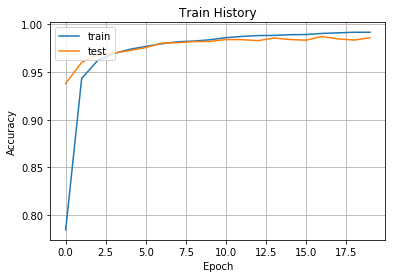

In [246]:
show_train_history('acc','val_acc')

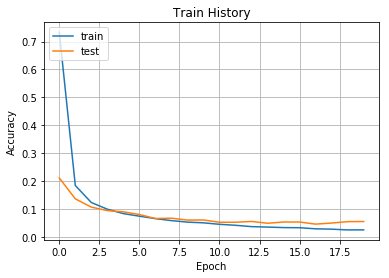

In [247]:
show_train_history('loss','val_loss')

# 评估模型的准确率

In [248]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 184us/step


0.9862

# 预测结果

In [249]:
prediction=model.predict_classes(x_Test4D_normalize)

In [250]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看预测结果

In [251]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

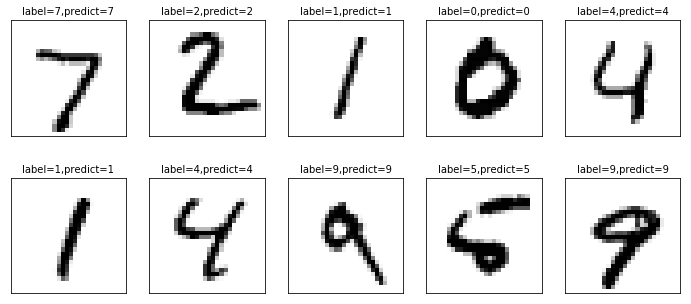

In [252]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [253]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,1,0,0,1,1,2,1,0
1,0,1127,1,1,0,1,1,3,1,0
2,0,3,1019,0,1,0,0,9,0,0
3,0,0,2,1003,0,1,0,2,0,2
4,0,0,3,0,964,0,1,3,1,10
5,1,0,1,16,0,867,2,1,1,3
6,5,2,1,2,2,2,943,0,1,0
7,0,1,4,1,0,0,0,1021,0,1
8,4,1,8,1,0,1,0,5,952,2


In [254]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [255]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1393,5,3
2035,5,3
2291,5,3
2369,5,3
2597,5,3
2810,5,3
3702,5,3
4255,5,3
